# Exercice

L'objectif est de prendre un main un code qui permet d'entrainer un CNN. Nous utiliserons Python et quelques libraries pour la mise en forme.

# Installation des librairies

Il s'agit de librairies qui seront utilisées pour manipuler les images et le réseau de neurone. Il contient une fonction pour simplement rendre quelques images visibles à titre d'illustration.

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score

!pip install livelossplot
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential # Model type to be used
from tensorflow.keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
import numpy as np

# Visualisation display

def show_sample(X_train, Y_train):
  plt.figure(figsize=(5,5))
  plt.subplot(1,4,1)
  index = random.randint(0, X_train.shape[0])
  plt.title(Y_train[index])
  plt.imshow(X_train[index])
  plt.subplot(1,4,2)
  index = random.randint(0, X_train.shape[0])
  plt.title(Y_train[index])
  plt.imshow(X_train[index])
  plt.subplot(1,4,3)
  index = random.randint(0, X_train.shape[0])
  plt.title(Y_train[index])
  plt.imshow(X_train[index])
  plt.subplot(1,4,4)
  index = random.randint(0, X_train.shape[0])
  plt.title(Y_train[index])
  plt.imshow(X_train[index])

def show_fx_negatif(X_test, Y_pred, Y_test):

  Y_pred_classes = np.argmax(Y_pred, axis=1)
  Y_true_classes = np.argmax(Y_test, axis=1)

  FX_NEGATIF = X_test[(Y_pred_classes!=Y_true_classes)]
  Pred_fx_negatif = Y_pred_classes[(Y_pred_classes!=Y_true_classes)]
  GT_fx_negatif = Y_true_classes[(Y_pred_classes!=Y_true_classes)]

  fig, axs = plt.subplots(1, 5, constrained_layout=True)
  for p in range(0,5):
    i = random.randint(0, len(FX_NEGATIF)-1)
    axs[p].imshow(FX_NEGATIF[i])
    axs[p].set_title('GT '+str(GT_fx_negatif[i])+'| Pred '+str(Pred_fx_negatif[i]))

  fig.suptitle("Mauvais classement", y=0.7, fontsize=16)  # Réduit l'espace entre le titre principal et les graphiques

  plt.show()


def show_true_positif(X_test, Y_pred, Y_test):

  Y_pred_classes = np.argmax(Y_pred, axis=1)
  Y_true_classes = np.argmax(Y_test, axis=1)
  TR_POSITIF = X_test[(Y_pred_classes==Y_true_classes)]
  Pred_tx_positif = Y_pred_classes[(Y_pred_classes==Y_true_classes)]
  GT_tx_positif = Y_true_classes[(Y_pred_classes==Y_true_classes)]

  fig, axs = plt.subplots(1, 5, constrained_layout=True)
  for p in range(0,5):
    i = random.randint(0, len(TR_POSITIF)-1)
    axs[p].imshow(TR_POSITIF[i])
    axs[p].set_title('GT '+str(GT_tx_positif[i])+'| Pred '+str(Pred_tx_positif[i]))

  fig.suptitle("Bon classement", y=0.7, fontsize=16)  # Réduit l'espace entre le titre principal et les graphiques

  plt.show()


def accuracy_per_class(Y_true, Y_pred):
  Y_pred_classes = np.argmax(Y_pred, axis=1)
  Y_true_classes = np.argmax(Y_true, axis=1)

  unique_classes = np.unique(Y_true_classes)
  class_counts = {}

  for cls in unique_classes:
      class_counts[cls] = {
          'correct': np.sum((Y_true_classes == cls) & (Y_pred_classes == cls)),
          'incorrect': np.sum((Y_true_classes == cls) & (Y_pred_classes != cls))
      }

  #Prepare the data for the bar chart
  classes = list(class_counts.keys())
  correct_predictions = [class_counts[cls]['correct'] for cls in classes]
  incorrect_predictions = [class_counts[cls]['incorrect'] for cls in classes]

  #Create the bar chart
  x = np.arange(len(classes))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, correct_predictions, width, label='Correct Predictions')
  rects2 = ax.bar(x + width/2, incorrect_predictions, width, label='Incorrect Predictions')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Number of Predictions')
  ax.set_title('Prediction Accuracy per Class')
  ax.set_xticks(x)
  ax.set_xticklabels(classes)
  ax.legend()


  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()

  plt.show()

# Importation des données

**I -Importation et visualisation des données**

Nous utiliserons les données MNIST pour la prise en main de ce code. Cette base de données contient des images de chiffre écrit à la main.

MNIST Dataset Shape (images, hauteur, largeur):
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


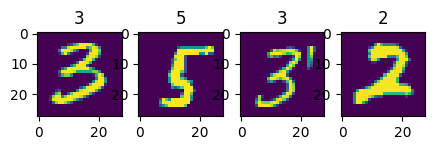

In [30]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('MNIST Dataset Shape (images, hauteur, largeur):')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

show_sample(X_train, Y_train)

## Constituer une base de données train, validation, test

**II - Division de la base de données en train, validation et test**


In [31]:
from sklearn.model_selection import train_test_split

# Assuming X_train and Y_train are already defined from the previous code

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
# test_size=0.2 represents 20% for validation
# random_state=42 preserve x_train and x_val splitting. 42

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_val:", Y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (48000, 28, 28)
Shape of Y_train: (48000,)
Shape of X_val: (12000, 28, 28)
Shape of Y_val: (12000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


**III - Pré-traitement des données**


Mise en forme des variables pour qu'elles correspondent aux entrées du réseau de neurone.

In [32]:
# Ajout d'un canneau supplémentaire
# Type de la données : float32
# Normalisation des données pour des pixels entre 0 et 1
# Input for model in exercice 1
X_train = X_train.reshape(X_train.shape[0],784).astype('float32') #add an additional dimension to represent the single-channel
X_val = X_val.reshape(X_val.shape[0], 784).astype('float32') #add an additional dimension to represent the single-channel
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train /= 255
X_val /= 255

X_train /= 255 # normalize each value for each pixel for the entire vector for each input
X_val /= 255 # normalize each value for each pixel for the entire vector for each input
X_test /= 255  # normalize each value for each pixel for the entire vector for each input


# one hot encode outputs
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

print("Training matrix shape", X_train.shape,Y_train.shape)
print("Validation matrix shape", X_val.shape,Y_val.shape)
print("Testing matrix shape", X_test.shape,Y_test.shape)

Training matrix shape (48000, 784) (48000, 10)
Validation matrix shape (12000, 784) (12000, 10)
Testing matrix shape (10000, 784) (10000, 10)


# Modèle CNN

**IV - Définition du modèle**


In [53]:
# # CN neural network
# model = Sequential([
#     Dense(10,input_shape=(784,)), # It is the output layer and should be equal to the number of desired classes (10 in this case).
#     Activation('softmax'),
# ])

# Including Dropout to reduce overfitting
Pkeep=0.25
model = Sequential([
    Dense(200, input_shape=(784,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(100, input_shape=(200,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(60, input_shape=(100,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(30, input_shape=(60,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(10),
    Activation('softmax'),
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,300 (723.83 KB)

 Trainable params: 185,300 (723.83 KB)

 Non-trainable params: 0 (0.00 B)

**V-a) Hyperparamètres du modèle et de l'entrainement**

Définition des hyperparamètres pour l'apprentissage :

1ère groupe:

- Algorithme d'optimisation
- Fonction de perte (dans le cas d'une classification)
- Métrique (dans le cas d'une classification)

In [42]:
learning_rate = 0.001 #@param {type:"number"}
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Use the specified learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2eme groupe:
- EarlyStopping
- Sauvegarde du meilleur modèle

In [43]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, mode='auto') #Stop training when a monitored metric has stopped improving.

checkpoint_filepath = '/content/best_ex1.keras'
Model_check = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='auto') #Callback to save the Keras model or model weights at some frequency.

3e groupe:
- Nombre de batch
- Nombre d'epoch
- Validation split
- Verbose : variable booleenne pour l'affichage de la progression de l'entrainement

Lorsque les hyperparamètres d'apprentissage et de l'architecture sont fixées, l'entrainement peut être lancé.

**V- b) Entrainement du modèle et évaluation du modèle sur les données de validation**

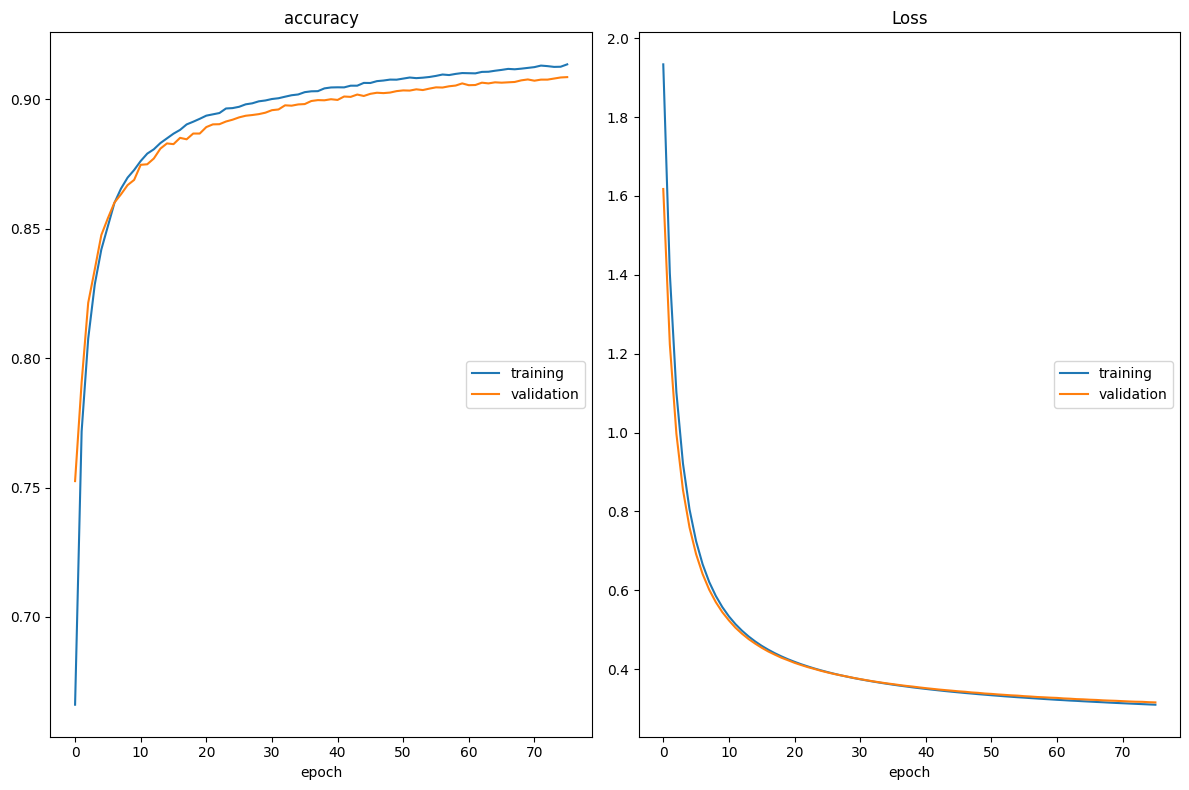

accuracy
	training         	 (min:    0.666, max:    0.914, cur:    0.914)
	validation       	 (min:    0.752, max:    0.909, cur:    0.909)
Loss
	training         	 (min:    0.310, max:    1.933, cur:    0.310)
	validation       	 (min:    0.316, max:    1.618, cur:    0.316)

Epoch 76: val_loss improved from 0.31649 to 0.31595, saving model to /content/best_ex1.keras
16800/16800 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9150 - loss: 0.3062 - val_accuracy: 0.9086 - val_loss: 0.3159
Epoch 77/1000
 3883/16800 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9043 - loss: 0.3388

KeyboardInterrupt: 

In [44]:
# Fiting the model
from livelossplot import PlotLossesKeras
plotlossesdeeper = PlotLossesKeras()
results = model.fit(X_train, Y_train,
                    batch_size=2, epochs=20,
                    validation_split=0.3,
                    verbose=1,
                    callbacks=[plotlossesdeeper,early_stop,Model_check])

## Evaluation

In [46]:
model = tf.keras.models.load_model('/content/best_ex1.keras') #Loading the best model

In [48]:
res_ = model.evaluate(X_test,Y_test,return_dict=True) #Evaluation of the model on the test dataset
print(res_)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7822 - loss: 100.6025
{'accuracy': 0.7979999780654907, 'loss': 93.82171630859375}


# Inférence

In [47]:
Y_pred = model.predict(X_test) # Prediction of classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
# Convert probabilities to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Calculate precision and recall
precision = precision_score(Y_true_classes, Y_pred_classes, average='macro')
recall = recall_score(Y_true_classes, Y_pred_classes, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.8828281608931443
Recall: 0.7965295984709446


TypeError: Invalid shape (784,) for image data

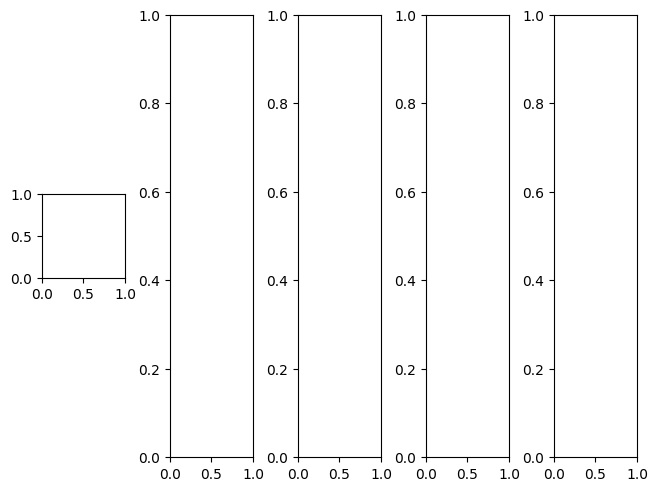

In [50]:
show_true_positif(X_test, Y_pred, Y_test)
show_fx_negatif(X_test, Y_pred, Y_test)

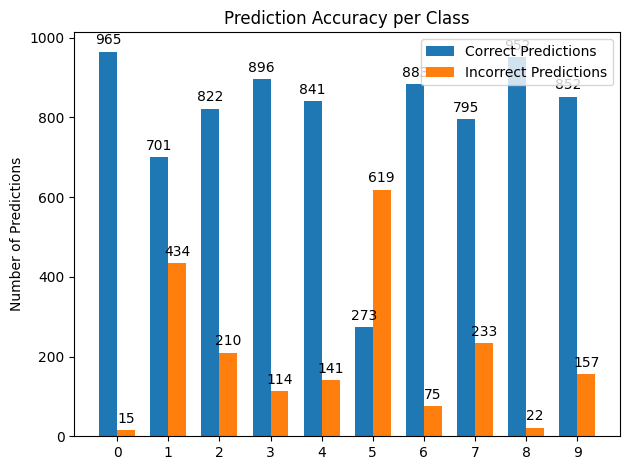

In [51]:
accuracy_per_class(Y_test, Y_pred)